In [1]:
import numpy as np
import optimization as opt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as mp3d

# Example: 2-Parameter Rosenbrock Function

A classic 2-parameter function used to test nonlinear optimization
routines is the 'Rosenbrock' function.  It has a shallow curved minimum
that wreaks havoc on the simplest routines.  It has the form:

$$f(x,y) = (a-x)^2 + b(y-x^2)^2$$

Where $a = 1$ and $b = 100$ by default. 
The minimum is zero at $x = a$, $y = a^2$ 

In [2]:
def rosenbrock(x, y, a=1, b=100):
    return((a-x)**2 + b*(y-(x**2))**2)

Let's evaluate the Rosenbrock function at $x = -1$ and $y = 2$.

In [3]:
params = {'x': -1, 'y': 2}
print('\nf(%g,%g) = %g' % (params['x'], params['y'], rosenbrock(**params)))


f(-1,2) = 104


# Visualizing the Rosenbrock Function as a Surface in 2D

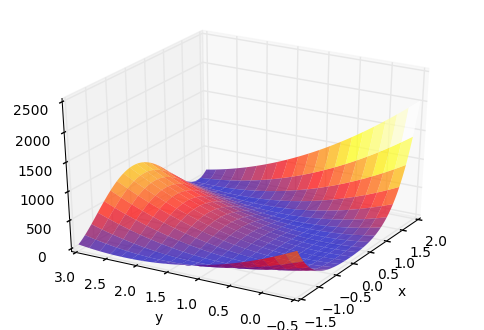

In [4]:
[x,y] = np.meshgrid(np.linspace(-1.5,2,201), np.linspace(-.5,3,201));
f = rosenbrock(x,y)

cMap = mcolors.LinearSegmentedColormap.from_list('rosenbrock', 
        [(0.0,0.0,0.75), 'red', 'yellow', 'white'], gamma=0.8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, f, cmap=cMap, linewidth=0, alpha=0.7)
ax.view_init(30,-150)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We will be using the method __opt.fit()__ to find the minimum. First, we must initialize a  __fit__ class object with the function to be minimized, starting parameters of the function, and a list of parameters that will be free to vary. We will reuse the initial parameter values from before. The two free parameters we are trying to minimize are x and y with no constraints (indicated with `'None'`). Ignore the `mask` attribute.

In [5]:
freeList = {'x': 'None', 'y': 'None'}
model = opt.fit(rosenbrock, params, freeList)
print(model) # nice!


	func: rosenbrock

	params: {'x': -1, 'y': 2}

	freeList: {'x': 'None', 'y': 'None'}

	mask: {}


Now, we can call the method __.fit()__ on the __fit__ object `model` to fit the Rosenbrock function. Within rounding error, the minimum should be zero at $f(1,1) = 0$.

In [6]:
[pBest,fBest] = model.fit()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 105
         Function evaluations: 195


In [7]:
print('\nParameter Fits: %s\nError: %g' % (pBest, fBest))


Parameter Fits: {'x': array(0.9999908938395383), 'y': array(0.999982724217811)}
Error: 1.70617e-10


Here's the location of the minimum on the plot of the surface:

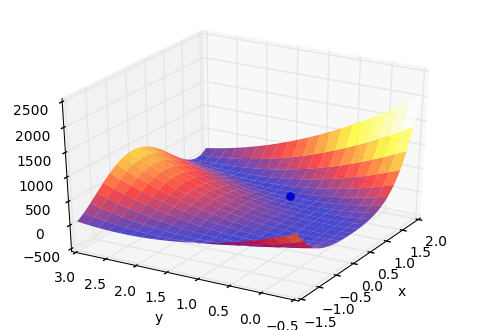

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f, cmap=cMap, linewidth=0, alpha=0.7)
ax.scatter(xs=pBest.get('x'), ys=pBest.get('y'), zs=fBest, s=40,
           facecolors=(0.0,0.0,1.0), edgecolors='none', zorder=2)
ax.view_init(30,-150)
ax.set_xlim3d([-1.5,2])
ax.set_ylim3d([-0.5,3])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can also perform a constrained parameter search. The __.fit__ method will perform another nonlinear optimization search on the same initialized function and parameters, but the parameter search will be constrained by lower and upper boundaries passed through in the `freeList`. The format for each free parameter is as follows: 

`{'freeParam1': [[lower bound], [upper bound]], ...}`

The lower and upper bound arrays must have the same dimensions are the free parameters.

In [9]:
freeList = {'x': [2, np.inf], 'y': [0, 0.5]} # this is alright for scalar free parameters
[pCon,fCon] = model.fit(freeList=freeList)

Optimization terminated successfully.
         Current function value: 1226.002540
         Iterations: 97
         Function evaluations: 195


In [10]:
print('\nConstrained Parameter Fits: %s\nConstrained Error: %g' % (pCon, fCon))


Constrained Parameter Fits: {'x': array(2.000000136451064), 'y': array(0.49999691752167585)}
Constrained Error: 1226


Here's the location of the constrained minimum on the plot of the surface:

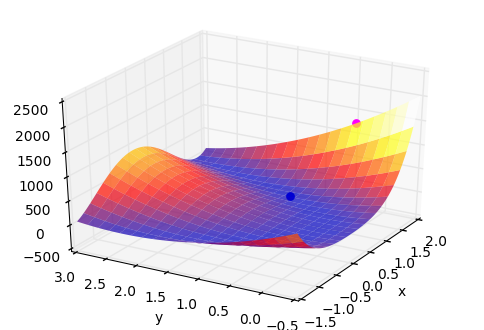

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, f, cmap=cMap, linewidth=0, alpha=0.7)
ax.scatter(xs=pBest.get('x'), ys=pBest.get('y'), zs=fBest, s=40,
           facecolors=(0.0,0.0,1.0), edgecolors='none')
pink = ax.scatter(xs=pCon.get('x'), ys=pCon.get('y'), zs=fCon, s=40,
           facecolors=(1.0,0.0,1.0), edgecolors='none')
ax.view_init(30,-150)
ax.set_xlim3d([-1.5,2])
ax.set_ylim3d([-0.5,3])
plt.xlabel('x')
plt.ylabel('y')
plt.show()